In [156]:
# This is the hackathon problem from Analytics Vidhya
# Import Libraries
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Train Dataset


In [157]:
train_df = pd.read_csv('/content/train.csv')

In [158]:
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [159]:
train_df.shape

(614, 13)

In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [161]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [163]:
train_df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [164]:
train_df['Gender'].fillna('Male',inplace=True,axis=0)
train_df['Married'].fillna('Yes',inplace=True,axis=0)
train_df['Education'].fillna('Graduate',inplace=True,axis=0)
train_df['Self_Employed'].fillna('No',inplace=True,axis=0)
train_df['Loan_Status'].fillna('Y',inplace=True,axis=0)
train_df['Dependents'].fillna('0',inplace=True,axis=0)

train_df['LoanAmount'].fillna('146.412162',inplace=True,axis=0)
train_df['Loan_Amount_Term'].fillna('342.00000',inplace=True,axis=0)
train_df['Credit_History'].fillna('0.842199',inplace=True,axis=0)


In [165]:

enc = LabelEncoder()

train_df['Loan_ID'] = enc.fit_transform(
    train_df['Loan_ID'])

train_df['Gender'] = enc.fit_transform(
      train_df['Gender'])

train_df['Married'] = enc.fit_transform(
        train_df['Married'])

train_df['Dependents'] = enc.fit_transform(
          train_df['Dependents'])

train_df['Education'] = enc.fit_transform(
          train_df['Education'])

train_df['Self_Employed'] = enc.fit_transform(
          train_df['Self_Employed'])

train_df['Property_Area'] = enc.fit_transform(
            train_df['Property_Area'])

train_df['Loan_Status'] = enc.fit_transform(
            train_df['Loan_Status'])

(array([0, 1]),
 [Text(0, 0, 'CoapplicantIncome'), Text(1, 0, 'ApplicantIncome')])

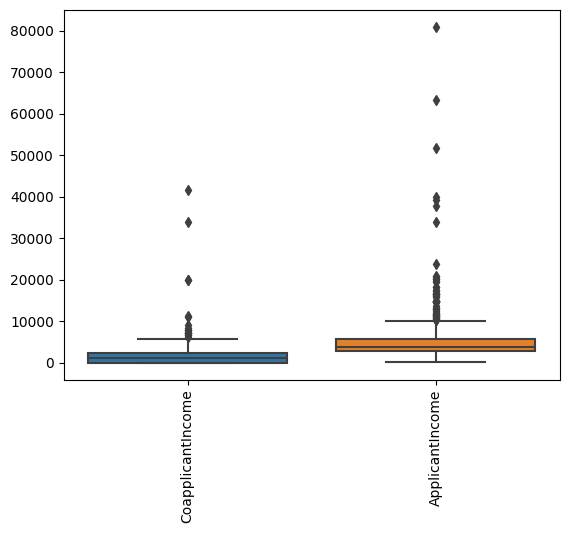

In [166]:
sns.boxplot(train_df[['CoapplicantIncome','ApplicantIncome']])
plt.xticks(rotation=90)

In [167]:
z = np.abs(stats.zscore(train_df['CoapplicantIncome']))

In [168]:
median = np.median(train_df['CoapplicantIncome'])

for i in np.where(z>3)[0]:
  train_df.iloc[i,7] = median

In [169]:
z = np.abs(stats.zscore(train_df['ApplicantIncome']))

In [170]:
median = np.median(train_df['ApplicantIncome'])

for i in np.where(z>3)[0]:
  train_df.iloc[i,6] = median

# Test Dataset

In [171]:
test_df = pd.read_csv('/content/test.csv')

In [172]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [173]:
test_df.shape

(367, 12)

In [174]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [175]:
test_df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP001015,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [176]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [177]:
impute_value = test_df['Gender'].mode()[0]
test_df['Gender'].fillna(impute_value,inplace=True,axis=0)

impute_value = test_df['Self_Employed'].mode()[0]
test_df['Self_Employed'].fillna(impute_value,inplace=True,axis=0)

impute_value = test_df['Dependents'].mode()[0]
test_df['Dependents'].fillna(impute_value,inplace=True,axis=0)

test_df['LoanAmount'].fillna('136.132597',inplace=True,axis=0)
test_df['Loan_Amount_Term'].fillna('342.537396',inplace=True,axis=0)
test_df['Credit_History'].fillna('0.825444',inplace=True,axis=0)


In [178]:
col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']

enc = LabelEncoder()

for i in col:
  test_df[i] = enc.fit_transform(test_df[i])

test_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2


(array([0, 1]),
 [Text(0, 0, 'CoapplicantIncome'), Text(1, 0, 'ApplicantIncome')])

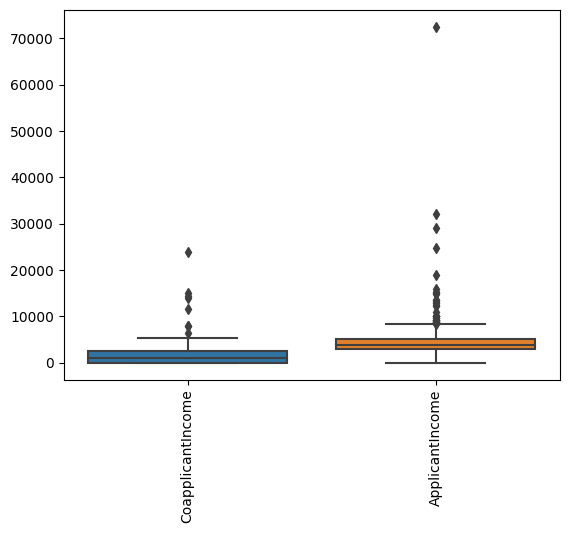

In [179]:
sns.boxplot(test_df[['CoapplicantIncome','ApplicantIncome']])
plt.xticks(rotation=90)

In [180]:
z = np.abs(stats.zscore(test_df['CoapplicantIncome']))

In [181]:
median = np.median(test_df['CoapplicantIncome'])

for i in np.where(z>3)[0]:
  test_df.iloc[i,7] = median

In [182]:
z = np.abs(stats.zscore(test_df['ApplicantIncome']))

In [183]:
median = np.median(test_df['ApplicantIncome'])

for i in np.where(z>3)[0]:
  test_df.iloc[i,6] = median

# Model Training

In [184]:
x_train = train_df.iloc[:,0:-1]
y_train = train_df['Loan_Status']

In [185]:
x_test = test_df

In [237]:
model = RandomForestClassifier(random_state=0, n_estimators=300,
                               criterion='gini').fit(x_train,y_train)

In [238]:
predicted_values = model.predict(x_test)

# Creating Solution File

In [188]:
data = pd.read_csv('/content/sample_submission.csv')

In [239]:
data['Loan_Status'] = predicted_values

In [240]:
result_values = {0:'N',1:'Y'}
data['Loan_Status'] = data['Loan_Status'].replace(result_values)

In [241]:
data.to_csv('result.csv', index=False)